## 前處理

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/train.csv",index_col="id")
test_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/test.csv",index_col="id")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    371 non-null    float64
 1   rotting_flesh  371 non-null    float64
 2   hair_length    371 non-null    float64
 3   has_soul       371 non-null    float64
 4   color          371 non-null    object 
 5   type           371 non-null    object 
dtypes: float64(4), object(2)
memory usage: 20.3+ KB


In [4]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [5]:
#看看各種type的顏色分佈
pd.crosstab(train_data["type"],train_data["color"])

color,black,blood,blue,clear,green,white
type,,,,,,
Ghost,14,6,6,32,15,44
Ghoul,14,4,6,42,13,50
Goblin,13,2,7,46,14,43


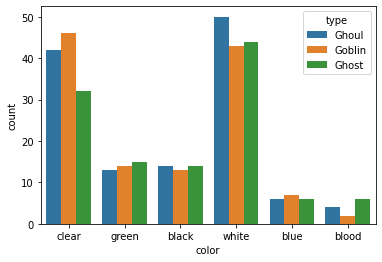

In [6]:
sns.countplot(x='color', hue='type', data=train_data)

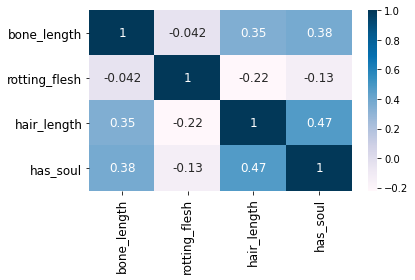

In [8]:
# 看看各變項間和type的相關
plt.tick_params(labelsize=12)
corr = train_data[["bone_length","rotting_flesh","hair_length","has_soul","color","type"]].corr()
sns.heatmap(corr,cmap="PuBu",annot=True,annot_kws={"size":12})
plt.tight_layout()

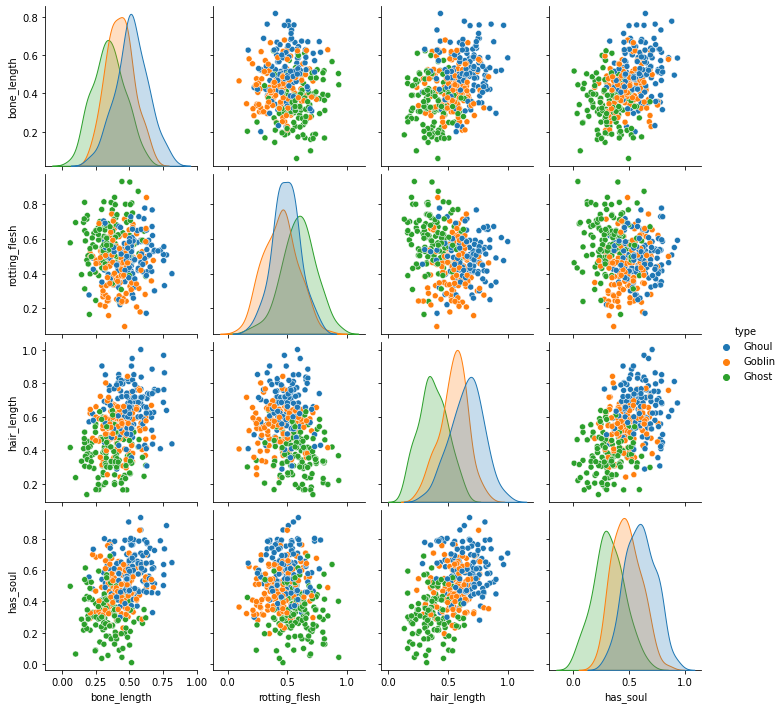

In [ ]:
#看看不同type各變項間的分布
sns.pairplot(train_data.drop('color', axis = 1), hue = 'type')

In [9]:
#切分 X 和 Y
X = train_data.iloc[:,:-1]
Y = train_data.iloc[:,-1]

#train data <color> =>dummy onehot encoding
X = pd.get_dummies(X,drop_first=True)

In [10]:
# spilt data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=13)

In [11]:
#處理test_data
test_data = pd.get_dummies(test_data,drop_first=True)

## 建立模型與預測

比較各種“樹“的演算法差異，再選擇最好的結果上傳

### decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

parameters = {'max_leaf_nodes': list(range(1, 16)), 
              'min_samples_split': np.linspace(.1, 1,10, endpoint=True),
              "max_features":[1,4,6],
              'max_depth':np.linspace(1, 16, 16, endpoint=True)}

grid_search = GridSearchCV(estimator = tree, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose=2,cv=5)

grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))


Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4168 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 10664 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 19720 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 31400 tasks      | elapsed:  1.8min


best score : 0.7181749622926094
best parameters : {'max_depth': 5.0, 'max_features': 6, 'max_leaf_nodes': 8, 'min_samples_split': 0.1}


[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  2.1min finished


In [23]:
tree_best = DecisionTreeClassifier(max_depth=5,max_features=6,max_leaf_nodes=8, min_samples_split=0.1,random_state = 0)

### random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)

parameters = {"n_estimators" : [512, 1024, 2048],
              "min_samples_leaf": [2,3,4,5],
              "min_samples_split" : [2,3,4,5],
              "max_depth" : [2, 4, 8, 16]}
grid_search = GridSearchCV(estimator = forest, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose=2,cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 24.3min finished


best score : 0.7533182503770739
best parameters : {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 512}


In [38]:
forest_best = RandomForestClassifier(random_state = 0,max_depth=16, min_samples_leaf=4, min_samples_split=2,n_estimators=512)

### XGboost

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)

parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "learning_rate": [0.01,0.1,0.5],
              "max_depth" : [2, 4, 8, 16]}
                    
grid_search = GridSearchCV(estimator = xgb, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose = 2,cv = 5)

grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


best score : 0.745475113122172
best parameters : {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 1024}


In [39]:
xgb_best = XGBClassifier(random_state=0,learning_rate=0.5, max_depth=4, n_estimators=1024)

### light GBM

In [28]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=0)
parameters = {"n_estimators" : [216, 512, 1024, 2048],
              'learning_rate': [0.01,0.1,0.5],
              "max_depth": [5,10,50,100]}

grid_search = GridSearchCV(estimator = lgbm, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   57.3s


best score : 0.73763197586727
best parameters : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 216}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.1min finished


In [40]:
lgbm_best = LGBMClassifier(random_state=0,learning_rate=0.01,max_depth=10,n_estimators=216)

### Adaboost 



In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0)
parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "learning_rate": [0.01,0.1,0.5]}

grid_search = GridSearchCV(estimator = ada, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished


best score : 0.6987179487179487
best parameters : {'learning_rate': 0.5, 'n_estimators': 216}


In [41]:
ada_best = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=216)

### Extra Tree

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(random_state=0)

parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "max_depth" : [2, 4, 8, 16]}

grid_search = GridSearchCV(estimator = extra, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.9s


best score : 0.7416289592760181
best parameters : {'max_depth': 2, 'n_estimators': 216}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


In [42]:
extra_best = ExtraTreesClassifier(random_state=0,max_depth= 2, n_estimators=216)

### Catboost


In [4]:
! pip install catboost

     |████████████████████████████████| 65.7MB 78kB/s 


In [5]:
from catboost import CatBoostClassifier , FeaturesData, Pool
from sklearn import metrics 

X_cat = train_data.iloc[:,:-1]
Y_cat = train_data.iloc[:,-1]
X_train_cat,X_test_cat,Y_train_cat,Y_test_cat = train_test_split(X_cat,Y_cat,test_size=0.3,random_state=13)
test_data_cat = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/test.csv",index_col="id")
cat_features=[4] #告訴他哪個是類別變項

In [6]:
# 參數選擇
cat = CatBoostClassifier()

parameters = {'iterations':[200,6000,10000],
                'learning_rate': [0.01,0.02,0.07],
                'metric_period':[23,42,500],
                'depth': [4,8,10]
                }

train_dataset = Pool(data=X_train_cat,
                     label=Y_train_cat,
                     cat_features=cat_features)


grid_search_result = cat.grid_search(parameters,
                                     X=train_dataset,
                                     plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7816309217
bestIteration = 199

0:	loss: 0.7816309	best: 0.7816309 (0)	total: 552ms	remaining: 44.2s

bestTest = 0.7039848374
bestIteration = 199

1:	loss: 0.7039848	best: 0.7039848 (1)	total: 873ms	remaining: 34.5s

bestTest = 0.6062042887
bestIteration = 138

2:	loss: 0.6062043	best: 0.6062043 (2)	total: 1.22s	remaining: 31.6s

bestTest = 0.6056070358
bestIteration = 1311

3:	loss: 0.6056070	best: 0.6056070 (3)	total: 10.6s	remaining: 3m 24s

bestTest = 0.6089105254
bestIteration = 644

4:	loss: 0.6089105	best: 0.6056070 (3)	total: 20.1s	remaining: 5m 6s

bestTest = 0.6062042887
bestIteration = 138

5:	loss: 0.6062043	best: 0.6056070 (3)	total: 29.6s	remaining: 6m 10s

bestTest = 0.6056070358
bestIteration = 1311

6:	loss: 0.6056070	best: 0.6056070 (3)	total: 45.4s	remaining: 7m 59s

bestTest = 0.6089105254
bestIteration = 644

7:	loss: 0.6089105	best: 0.6056070 (3)	total: 1m 1s	remaining: 9m 18s

bestTest = 0.6062042887
bestIteration = 138

8:	loss: 0.6062043	best: 0.6

In [7]:
cat = CatBoostClassifier()

cat_fit = cat.fit(X_train_cat,Y_train_cat,cat_features)

Y_test_predicted = cat_fit.predict(X_test_cat)
accuracy = metrics.accuracy_score(Y_test_cat, Y_test_predicted)
print(accuracy)
# cat_ans = cat_fit.predict(test_data_cat)
# cat = pd.DataFrame(cat_ans,columns=["type"])
# id = pd.DataFrame({"id": np.asarray(test_data_cat.index)})
# cat["id"]=id["id"]
#cat.set_index("id").to_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/cat_1.csv")


Learning rate set to 0.073859
0:	learn: 1.0540716	total: 6.6ms	remaining: 6.6s
1:	learn: 1.0180788	total: 11.1ms	remaining: 5.54s
2:	learn: 0.9845236	total: 15.3ms	remaining: 5.08s
3:	learn: 0.9534783	total: 19.7ms	remaining: 4.91s
4:	learn: 0.9311808	total: 24.2ms	remaining: 4.82s
5:	learn: 0.9099784	total: 28.8ms	remaining: 4.77s
6:	learn: 0.8881578	total: 30.7ms	remaining: 4.36s
7:	learn: 0.8704601	total: 34.9ms	remaining: 4.33s
8:	learn: 0.8528877	total: 46.1ms	remaining: 5.07s
9:	learn: 0.8350747	total: 50.7ms	remaining: 5.02s
10:	learn: 0.8169565	total: 55ms	remaining: 4.95s
11:	learn: 0.8002581	total: 59.4ms	remaining: 4.89s
12:	learn: 0.7858934	total: 63.9ms	remaining: 4.85s
13:	learn: 0.7714997	total: 66.6ms	remaining: 4.69s
14:	learn: 0.7565924	total: 69.4ms	remaining: 4.55s
15:	learn: 0.7432199	total: 73.6ms	remaining: 4.52s
16:	learn: 0.7306490	total: 77.8ms	remaining: 4.5s
17:	learn: 0.7187781	total: 82.1ms	remaining: 4.48s
18:	learn: 0.7103099	total: 86.3ms	remaining: 4.4

### 選擇模型

In [52]:
#選出表現最好的演算法

voting_clf = VotingClassifier(estimators=[('df', tree_best), ('rf', forest_best), ('xgb', xgb_best), ('lgbm', lgbm_best), ('ada', ada_best),('extra',extra_best)]
                              , voting='hard')
voting_clf.fit(X_train, Y_train)
y_pred = voting_clf.predict(test_data)
print("\nAccuracy Score for VotingClassifier is: " + str(voting_clf.score(X_train, Y_train)))


Accuracy Score for VotingClassifier is: 0.9073359073359073


In [53]:
submission = pd.DataFrame({'id':test_data.index, 'type':y_pred})
submission.to_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/ans.csv', index=False)

### 上傳分數

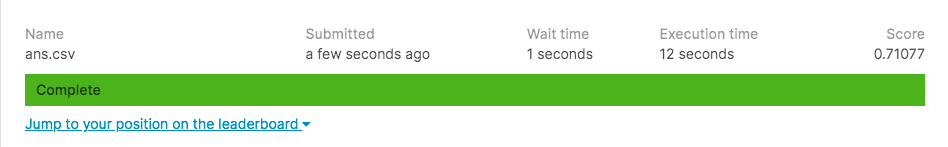